In [2]:
import os
from matplotlib import pyplot as plt
from smoothadv.analyze import Line, ApproximateAccuracy, plot_certified_accuracy
import glob

In [3]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams['lines.linewidth'] = 3

In [12]:
def parse_title(s):
    #print(s)
    out = s.split('/')[-1].split('_')
    if 'salman' in out:
        sigma = float(out[-1])
        patchsize = 0
    else:
        sigma = float(out[2])
        patchsize = float(out[4].split('.')[0])
    return sigma, patchsize

In [13]:
def get_lines_list(rpath, filter_val, patch='patch'):
    dpaths = [rpath+f for f in os.listdir(rpath) if f[0]!='.' and filter_val in f]
    res = [Line(ApproximateAccuracy(i), f'{patch} resnet50, sigma:{parse_title(i)[0]}, patch size:{parse_title(i)[1]}') for i in dpaths]
    return res

In [14]:
res1 = get_lines_list('certify_results/', '0.12', 'patch')
res2 = get_lines_list('certify_results_base_nopatch/', '0.12', 'base')
res3 = get_lines_list('orig_salman_results/', '0.12', 'salman')
res1.extend(res2)
res1.extend(res3)

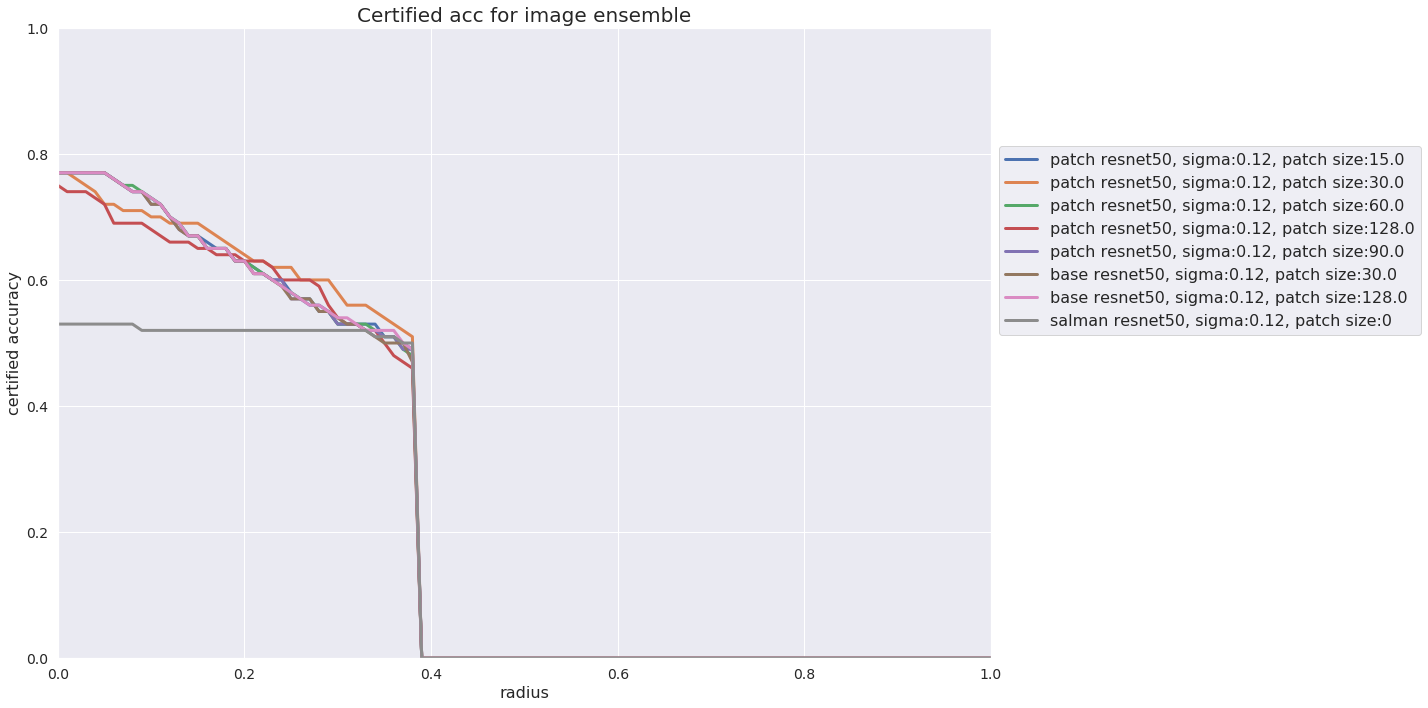

In [15]:
plot_certified_accuracy('certified_acc', 'Certified acc for image ensemble', 1.0, res1)

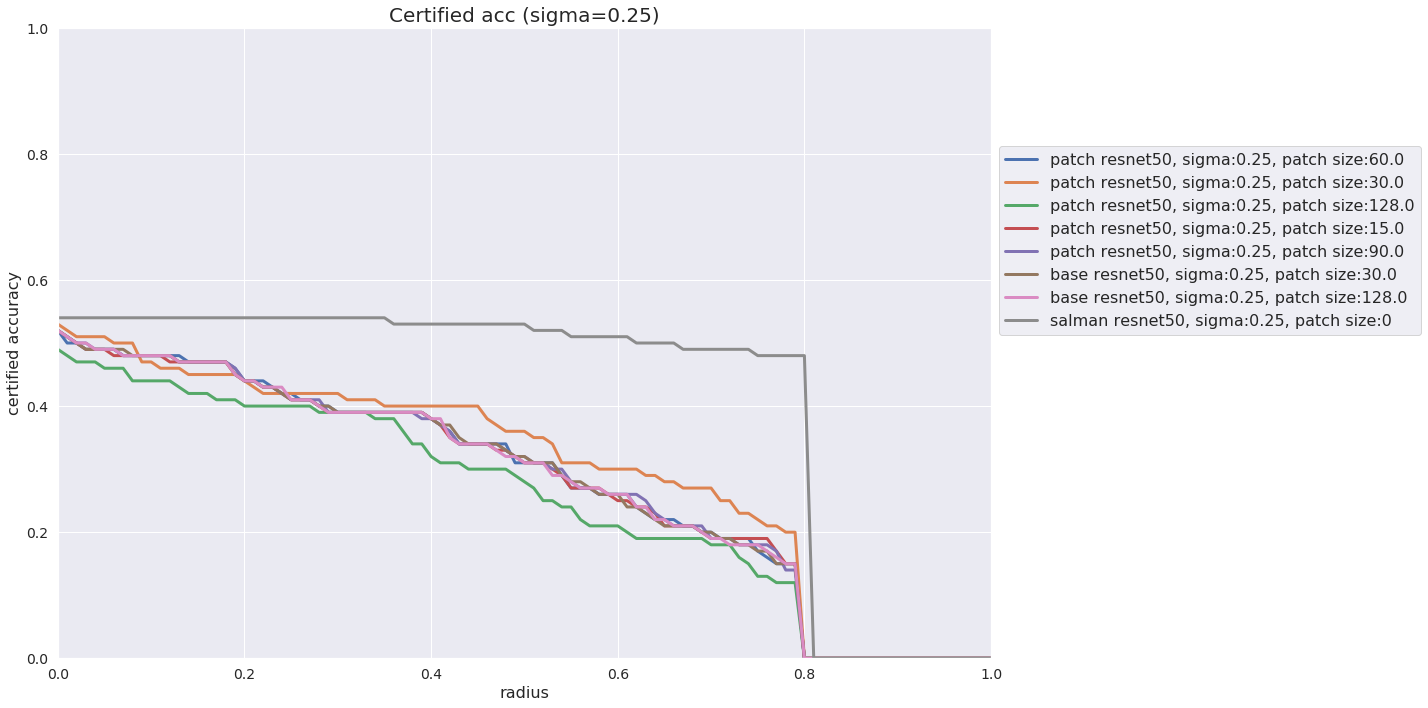

In [17]:
res1 = get_lines_list('certify_results/', '0.25', 'patch')
res2 = get_lines_list('certify_results_base_nopatch/', '0.25', 'base')
res3 = get_lines_list('orig_salman_results/', '0.25', 'salman')
res1.extend(res2)
res1.extend(res3)
plot_certified_accuracy('certified_acc', 'Certified acc (sigma=0.25)', 1.0, res1)

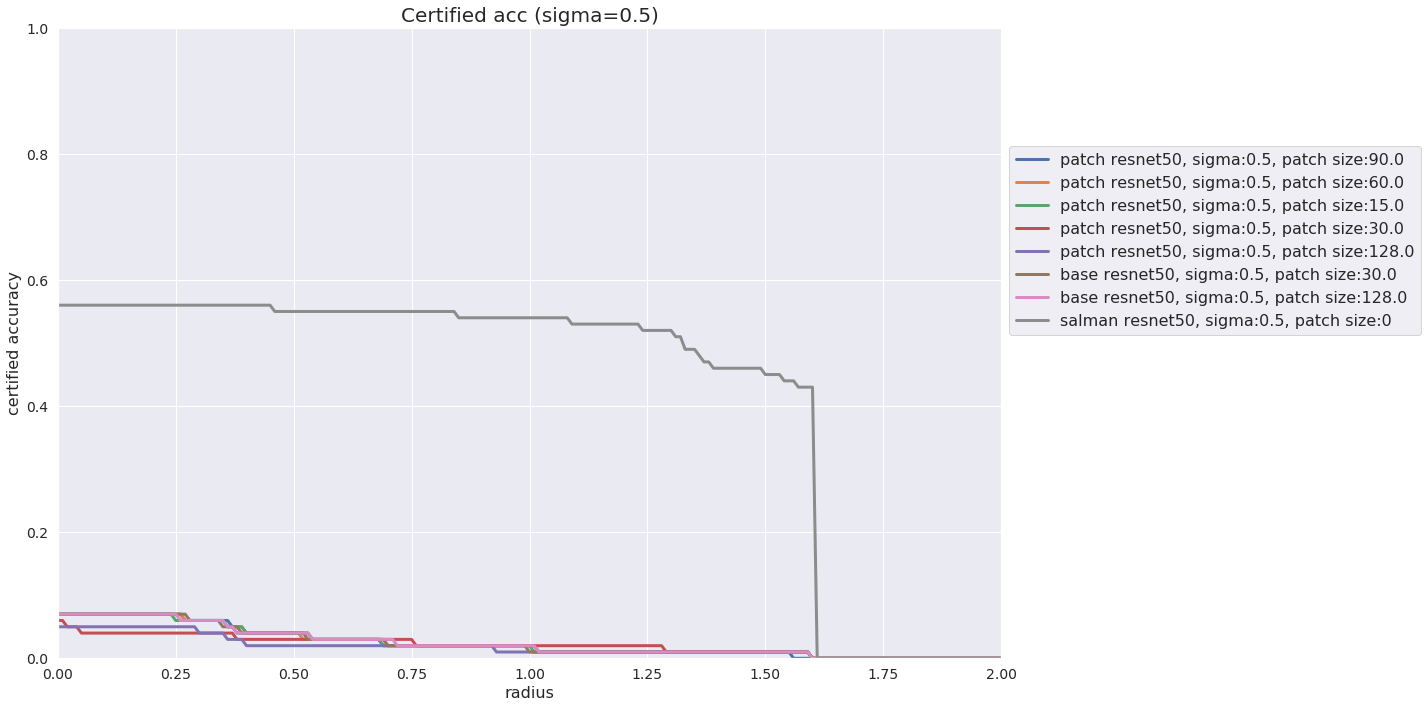

In [20]:
res1 = get_lines_list('certify_results/', '0.5', 'patch')
res2 = get_lines_list('certify_results_base_nopatch/', '0.5', 'base')
res3 = get_lines_list('orig_salman_results/', '0.5', 'salman')
res1.extend(res2)
res1.extend(res3)
plot_certified_accuracy('certified_acc', 'Certified acc (sigma=0.5)', 2.0, res1)

In [22]:
# res1 = get_lines_list('certify_results/', '1.0', 'patch')
# res2 = get_lines_list('certify_results_base_nopatch/', '1.0', 'base')
# res3 = get_lines_list('orig_salman_results/', '1.0', 'salman')
# res1.extend(res2)
# res1.extend(res3)
# plot_certified_accuracy('certified_acc', 'Certified acc (sigma=1.0)', 2.0, res1)